<a href="https://colab.research.google.com/github/adityajain2407/aj-biz-cases/blob/main/Copy_of_aj_Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Scaler [Clustering]

https://scalerinternal.slack.com/archives/D03ECQV478W/p1691234376688839?thread_ts=1680518161.341639&cid=D03ECQV478W


In [ ]:
'''
Notes:

Msg: https://scalerinternal.slack.com/archives/D03ECQV478W/p1691234376688839?thread_ts=1680518161.341639&cid=D03ECQV478W

Pre-processing is reqd as lots of job positions map to same - regex
min - preprocessing reqd - lower and strip
Discuss the imputation level - give eg of Netflix missing values - company-job level, company and then oeverall
now replacing by median instead of mean?
any reason to prefer median over mean? - outliers


Issues with org year
One easy way to handle ctc_yr <  org_yr cases
so orgyr will never be > ctc update - as mostl like you go for changed ctc
#We see some 'nan's in job_position --> if during pre-precessing changed everything to string
#nan is no longer nan so change back else incorrect output
df.loc[df['job_position']=='nan', 'job_position']=np.nan



Created a new feature --> designation lvel - can check the code that i will share, but ill tell the logic
top 25 percentile in same company, JD, YOE --> 1,
nest 252,
bottom 50 --> 3
2nd feature is clsss --> as people with diff yoe can have same role as just about to promote
so class better at same designation
company, jd level
3rd feature - tear --> at company level only - sde > hr > ops > deliver , etc (eg)
Bascially all these new features are also correlated to ctc - anchored similar to Target encoding - if someone asks
but here relative performance is also getting into considration



Ask about transform and groupby - bascially show eg of both with mean
transofrm is similar to window func
for every row 1 col attached
can aslo do using group by and then merge to attach it - as a alternative to transform
Focus is on logic and appraoch - will sahre code anyways


'''

"\nNotes:\n\nMsg: https://scalerinternal.slack.com/archives/D03ECQV478W/p1691234376688839?thread_ts=1680518161.341639&cid=D03ECQV478W\n\nPre-processing is reqd as lots of job positions map to same - regex\nmin - preprocessing reqd - lower and strip\nDiscuss the imputation level - give eg of Netflix missing values - company-job level, company and then oeverall\nnow replacing by median instead of mean?\nany reason to prefer median over mean? - outliers\n\n\nIssues with org year\nOne easy way to handle ctc_yr <  org_yr cases\nso orgyr will never be > ctc update - as mostl like you go for changed ctc\n#We see some 'nan's in job_position --> if during pre-precessing changed everything to string\n#nan is no longer nan so change back else incorrect output\ndf.loc[df['job_position']=='nan', 'job_position']=np.nan\n\n\n\nCreated a new feature --> designation lvel - can check the code that i will share, but ill tell the logic\ntop 25 percentile in same company, JD, YOE --> 1,\nnest 252,\nbottom 

In [ ]:
import re
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('scaler_hashed_for_students.csv')
df.head(2)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0


In [ ]:
pd.DataFrame(df.job_position.value_counts())[50:60]

,job_position
Reseller,1
software engineer 2B,1
Driver,1
User Experience Specialist,1
Analyst programmer,1
Senior Software Developer,1
Associate System Engineer - Trainee,1
Front end developer,1
Business Man,1
no job,1


In [ ]:
df.job_position.value_counts()[:10]

Backend Engineer          4615
Other                     3745
FullStack Engineer        3508
Frontend Engineer         1301
Support Engineer          1006
QA Engineer                921
Data Analyst               687
Data Scientist             411
Engineering Leadership     397
Android Engineer           369
Name: job_position, dtype: int64

# Data Preprocessing - Cleaning of all variables

In [ ]:
df.drop(columns=['email_hash','Unnamed: 0'],inplace=True)

In [ ]:
#just keeping all the alphabets in lower case and removing everything else - numbers and all to empty-->
#strip to avoid dangling spaces - sde-1,2,3 all are sde now
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [ ]:
df.job_position.nunique()

173

In [ ]:
df.job_position=df.job_position.apply(lambda x: preprocess_string(str(x)))
df.job_position.nunique()

162

In [ ]:
df.shape

(26510, 5)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(25210, 5)

should I drop them?

In [ ]:
df['company_hash'].value_counts().sort_index()

0                               2
1                               1
1000uqgltwn                     2
10nxbto                         2
121 ghnoghqwt xzaxv ucn rna     1
                               ..
zxztrtvuo                      10
zxzvzxjv sqghu                  1
zyco xzaxv                      1
zz                              2
zzzbzb                          1
Name: company_hash, Length: 8126, dtype: int64

In [ ]:
df.company_hash.nunique()

8126

In [ ]:
df.company_hash=df.company_hash.apply(lambda x: preprocess_string(str(x)))
df.company_hash.nunique()

8112

In [ ]:
df['company_hash'].value_counts().sort_index()

                                                16
a b onttr wgqu                                   1
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx     1
a ntwyzgrgsxto                                   3
aab xzegqbvnxwo                                  1
                                                ..
zxztrtvuo                                       10
zxzvzxjv sqghu                                   1
zyco xzaxv                                       1
zz                                               2
zzzbzb                                           1
Name: company_hash, Length: 8112, dtype: int64

In [ ]:
#removing rows where company or job_position is not available
df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]

### Filling Null values using Mean Target Inputation for Orgyear

In [ ]:
df['orgyear'].isnull().sum()

22

In [ ]:
df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)

<ipython-input-32-c74d87856429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)


In [ ]:
df = df.loc[~df['orgyear'].isna()]

### Checking for outliers in orgyear

In [ ]:
df.orgyear.head()

0    2016.0
1    2018.0
2    2015.0
3    2017.0
4    2017.0
Name: orgyear, dtype: float64

In [ ]:
df.orgyear.describe()

count    25186.000000
mean      2015.764214
std         23.732010
min          0.000000
25%       2015.000000
50%       2017.000000
75%       2018.000000
max       2106.000000
Name: orgyear, dtype: float64

<Axes: >

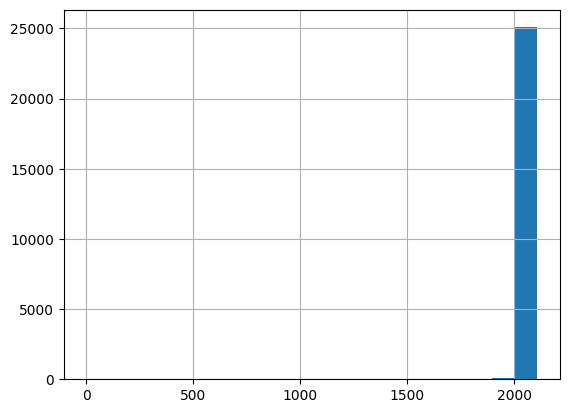

In [ ]:
#simple understanding
df.orgyear.hist(bins=20)

In [ ]:
df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))
df['ctc'] = df['ctc'].clip(lower=df.ctc.quantile(0.01), upper=df.ctc.quantile(0.99))

In [ ]:
#We see some 'nan's in job_position --> if during pre-precessing changed everything to string
#nan is no longer nan so change back else incorrect output
df.loc[df['job_position']=='nan', 'job_position']=np.nan

## Masking companies by renaming it to "Others" having count less than 5

In [ ]:
#making the code
df.company_hash.value_counts()

nvnv wgzohrnvzwj otqcxwto        1030
xzegojo                           676
wgszxkvzn                         557
vwwtznhqt                         485
fxuqg rxbxnta                     451
                                 ... 
vxqogz trtwnqgzxw                   1
xbbxz                               1
nytoihvqt otqcxwta vuvqnbtzno       1
pvnvrjon ntwyzgrgsxto               1
wqtvnxct wgzonqhwnxgz vza wg        1
Name: company_hash, Length: 8103, dtype: int64

In [ ]:
#creating a bucket of others - to reduce down unique companies - if less than 4 employees
df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5, 'company_hash'] = 'Others'

#### Creating Years of Experience Columns

In [ ]:
df['orgyear'].describe()

count    25186.000000
mean      2016.077523
std          3.270824
min       2003.000000
25%       2015.000000
50%       2017.000000
75%       2018.000000
max       2021.000000
Name: orgyear, dtype: float64

In [ ]:
df['years_of_experience']=2022-df['orgyear']
#a new feature to check how many yrs in the current company

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(21531, 6)

In [ ]:
df=df[~df['years_of_experience'].isnull()]

In [ ]:
# update cant be before joining - you can also change org to ctc with min - basically ctc >= org year
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

In [ ]:
#Filling null values with others  -- if not done before
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [ ]:
df.isnull().sum()
#All good now

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(21448, 6)

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,21448.000000,2.144800e+04,21448.000000,21448.000000
mean,2015.928968,3.667101e+06,2020.254056,6.071032
std,3.395336,1.570207e+07,0.659517,3.395336
min,2003.000000,6.000000e+04,2015.000000,1.000000
25%,2014.000000,5.000000e+05,2020.000000,4.000000
50%,2016.000000,8.000000e+05,2020.000000,6.000000
75%,2018.000000,1.450000e+06,2021.000000,8.000000
max,2021.000000,1.200000e+08,2021.000000,19.000000


In [ ]:
df.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Others,2016.0,1100000.0,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0


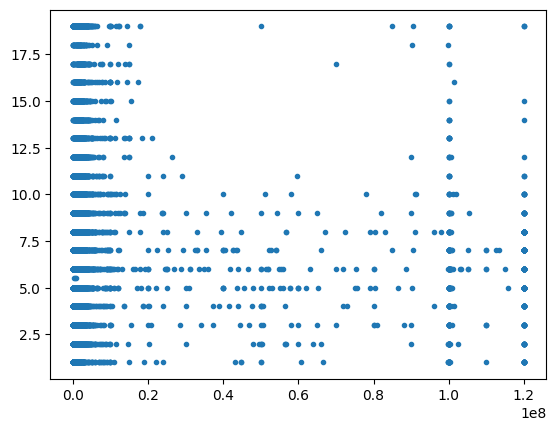

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['ctc'], df['years_of_experience'], '.')

---

## Manual Clustering based on company, job position and years of experience

In [ ]:
grouped_c_j_y = df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
grouped_c_j_y

count  \
years_of_experience job_position         company_hash                        
1.0                 Others               Others                       39.0   
                                         athnowyt ntrtpgb              1.0   
                                         atrr                          2.0   
                                         atrr ntwyzgrgsxto             1.0   
                                         atrr tbw                      1.0   
...                                                                    ...   
19.0                sr executive         Others                        1.0   
                    support engineer     Others                        2.0   
                                         exotqc                        1.0   
                                         xzegojo                       1.0   
                    technical consulting ytfrtnn uvwpvqa tzntquqxot    1.0   

                                                                             mean  \
years_of_experience job_position         company_hash                               
1.0                 Others               Others                      5.577744e+06   
                                         athnowyt ntrtpgb            2.800000e+06   
                                         atrr                        4.500000e+05   
                                         atrr ntwyzgrgsxto           8.000000e+05   
                                         atrr tbw                    8.500000e+05   
...                                                                           ...   
19.0                sr executive         Others                      1.500000e+06   
                    support engineer     Others                      6.003000e+07   
                                         exotqc                      2.700000e+06   
                                         xzegojo                     1.300000e+06   
                    technical consulting ytfrtnn uvwpvqa tzntquqxot  2.500000e+06   

                                                                              std  \
years_of_experience job_position         company_hash                               
1.0                 Others               Others                      2.009486e+07   
                                         athnowyt ntrtpgb                     NaN   
                                         atrr                        2.121320e+05   
                                         atrr ntwyzgrgsxto                    NaN   
                                         atrr tbw                             NaN   
...                                                                           ...   
19.0                sr executive         Others                               NaN   
                    support engineer     Others                      8.481039e+07   
                                         exotqc                               NaN   
                                         xzegojo                              NaN   
                    technical consulting ytfrtnn uvwpvqa tzntquqxot           NaN   

                                                                           min  \
years_of_experience job_position         company_hash                            
1.0                 Others               Others                       120000.0   
                                         athnowyt ntrtpgb            2800000.0   
                                         atrr                         300000.0   
                                         atrr ntwyzgrgsxto            800000.0   
                                         atrr tbw                     850000.0   
...                                                                        ...   
19.0                sr executive         Others                      1500000.0   
                    support engineer     Others                        60000.0   
                      

In [ ]:
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how='left')
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,140.0,8.415500e+06,2.496156e+07,60000.0,400000.00,655000.0,1062500.0,120000000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,4.0,6.924998e+05,2.110888e+05,449999.0,577499.75,685000.0,800000.0,950000.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,102.0,1.188275e+06,1.082367e+06,60000.0,585000.00,950000.0,1437500.0,9000000.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2.0,9.500000e+05,3.535534e+05,700000.0,825000.00,950000.0,1075000.0,1200000.0
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,135.0,1.714689e+06,5.580048e+06,60000.0,465000.00,800000.0,1200000.0,60000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21443,Others,2020.0,200000.0,ml engineer,2021.0,2.0,1.0,2.000000e+05,NaN,200000.0,200000.00,200000.0,200000.0,200000.0
21444,bxwqgogen,2015.0,3200000.0,backend engineer,2020.0,7.0,3.0,3.500000e+06,4.358899e+05,3200000.0,3250000.00,3300000.0,3650000.0,4000000.0
21445,Others,2017.0,3150000.0,fullstack engineer,2020.0,5.0,135.0,1.714689e+06,5.580048e+06,60000.0,465000.00,800000.0,1200000.0,60000000.0
21446,wvustbxzx,2019.0,470000.0,Others,2021.0,3.0,18.0,6.305556e+05,1.728812e+05,300000.0,477500.00,680000.0,757500.0,880000.0


### Creating Designation basis on the salary they are getting in their respective company

In [ ]:
def segment(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [ ]:
df_cjy['designation'] =df_cjy.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,140.0,8415499.95,2.496156e+07,60000.0,400000.00,655000.0,1062500.0,120000000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,4.0,692499.75,2.110888e+05,449999.0,577499.75,685000.0,800000.0,950000.0,3


In [ ]:
df_cjy.designation.value_counts(normalize=True)

2    0.489649
3    0.311498
1    0.198853
Name: designation, dtype: float64

## Manual Clustering based on company and job position

In [ ]:
'''
Created a new feature --> designation lvel - can check the code that i will share, but ill tell the logic
top 25 percentile in same company, JD, YOE --> 1,
nest 252,
bottom 50 --> 3
2nd feature is clsss --> as people with diff yoe can have same role as just about to promote
so class better at same designation
company, jd level
3rd feature - tear --> at company level only - sde > hr > ops > deliver , etc (eg)
Bascially all these new features are also correlated to ctc - anchored similar to Target encoding - if someone asks
but here relative performance is also getting into considration

so after this, no need to worry about company_name and job_profile --> can now use these newly created features to get ahead with clustering
'''

In [ ]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()
grouped_c_j.head()

count          mean           std       min  \
job_position company_hash                                                     
Others       Others            1105.0  3.756701e+06  1.507333e+07   60000.0   
             adw ntwyzgrgsj      10.0  8.985000e+05  6.110831e+05  400000.0   
             adw ntwyzgrgsxto     8.0  6.257500e+05  3.798668e+05  100000.0   
             ahzkg                2.0  9.000000e+05  8.485281e+05  300000.0   
             amo mvzp             7.0  1.145714e+06  4.690010e+05  700000.0   

                                    25%        50%        75%          max  
job_position company_hash                                                   
Others       Others            450000.0   800000.0  1600000.0  120000000.0  
             adw ntwyzgrgsj    510000.0   642500.0  1135000.0    2300000.0  
             adw ntwyzgrgsxto  400000.0   535000.0   802000.0    1300000.0  
             ahzkg             600000.0   900000.0  1200000.0    1500000.0  
             amo mvzp          760000.0  1000000.0  1450000.0    1900000.0

In [ ]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')
df_cj.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,979.0,6.070020e+06,2.081299e+07,60000.0,400000.0,670000.0,1200000.0,120000000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,9.0,7.244443e+05,3.361218e+05,300000.0,470000.0,620000.0,950000.0,1380000.0


### Creating Class basis on the salary they are getting in their respective company

In [ ]:
df_cj['classs'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,Others,2016.0,1100000.0,other,2020.0,6.0,979.0,6.070020e+06,2.081299e+07,60000.0,400000.0,670000.0,1200000.0,120000000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,9.0,7.244443e+05,3.361218e+05,300000.0,470000.0,620000.0,950000.0,1380000.0,3


In [ ]:
df_cj.classs.value_counts(normalize=True)

3    0.415050
2    0.341897
1    0.243053
Name: classs, dtype: float64

In [ ]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Others,1305.0,7.681357e+06,2.251923e+07,340000.0,1200000.0,1800000.0,3000000.0,120000000.0
backend engineer,982.0,8.255443e+06,2.293701e+07,360000.0,1400000.0,2100000.0,3500000.0,120000000.0
other,742.0,1.886382e+07,3.687836e+07,240000.0,1100000.0,1615000.0,4725000.0,120000000.0
fullstack engineer,714.0,8.048387e+06,2.349194e+07,380000.0,1200000.0,1800000.0,2800000.0,120000000.0
frontend engineer,259.0,9.043537e+06,2.477781e+07,450000.0,1200000.0,1600000.0,2500000.0,120000000.0
support engineer,220.0,1.856448e+07,3.940505e+07,400000.0,920000.0,1200000.0,2250000.0,120000000.0
qa engineer,193.0,1.373269e+07,3.221045e+07,420000.0,1010000.0,1400000.0,2700000.0,120000000.0
data analyst,162.0,2.218325e+07,4.274685e+07,300000.0,1000000.0,1500000.0,4500000.0,120000000.0
engineering leadership,85.0,2.368082e+07,4.090974e+07,480000.0,2700000.0,4000000.0,9500000.0,120000000.0


In [ ]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [ ]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1
...,...,...,...,...,...,...,...,...
21443,Others,2020.0,200000.0,ml engineer,2021.0,2.0,2,2
21444,bxwqgogen,2015.0,3200000.0,backend engineer,2020.0,7.0,2,3
21445,Others,2017.0,3150000.0,fullstack engineer,2020.0,5.0,1,1
21446,wvustbxzx,2019.0,470000.0,Others,2021.0,3.0,3,3


## Manual Clustering based on comapny

In [ ]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,75.0,4.305867e+06,1.808745e+07,250000.0,475000.0,720000.0,1100000.0,120000000.0


### Creating Tier basis on the salary in the companies

In [ ]:
df_c['tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,75.0,4.305867e+06,1.808745e+07,250000.0,475000.0,720000.0,1100000.0,120000000.0,3


In [ ]:
df_c.tier.value_counts(normalize=True)

3    0.470021
2    0.294899
1    0.235080
Name: tier, dtype: float64

In [ ]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,75.0,4.305867e+06,1.808745e+07,250000.0,475000.0,720000.0,1100000.0,120000000.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2,3,10.0,1.136000e+06,8.857665e+05,520000.0,565000.0,925000.0,1200000.0,3500000.0,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0,2
5,Others,2018.0,700000.0,fullstack engineer,2020.0,4.0,3,3,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0,3
6,lubgqsvz wyvot wg,2018.0,1500000.0,fullstack engineer,2019.0,4.0,3,2,104.0,6.817212e+06,2.247290e+07,60000.0,1400000.0,1800000.0,2425000.0,120000000.0,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,2,11.0,8.081818e+05,9.233181e+05,300000.0,400000.0,450000.0,705000.0,3500000.0,3
8,utqoxontzn ojontbo,2020.0,450000.0,Others,2020.0,2.0,3,2,69.0,1.229710e+06,2.196682e+06,350000.0,580000.0,900000.0,1300000.0,18670000.0,3
9,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,6613.0,4.442877e+06,1.746260e+07,60000.0,460000.0,800000.0,1500000.0,120000000.0,3


In [ ]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,3


In [ ]:
df_cjy_cj_c.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience', 'classs', 'designation', 'tier'],
      dtype='object')

In [ ]:
#finally we will ahve these features after all discusison
X = df_cjy_cj_c[['ctc', 'years_of_experience', 'classs', 'designation', 'tier']].copy()

#how many clusters they got on hierarcial cluster - with this way you get 3

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_sc = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [ ]:
X_sc.shape

(21448, 5)

Text(0, 0.5, 'distance')

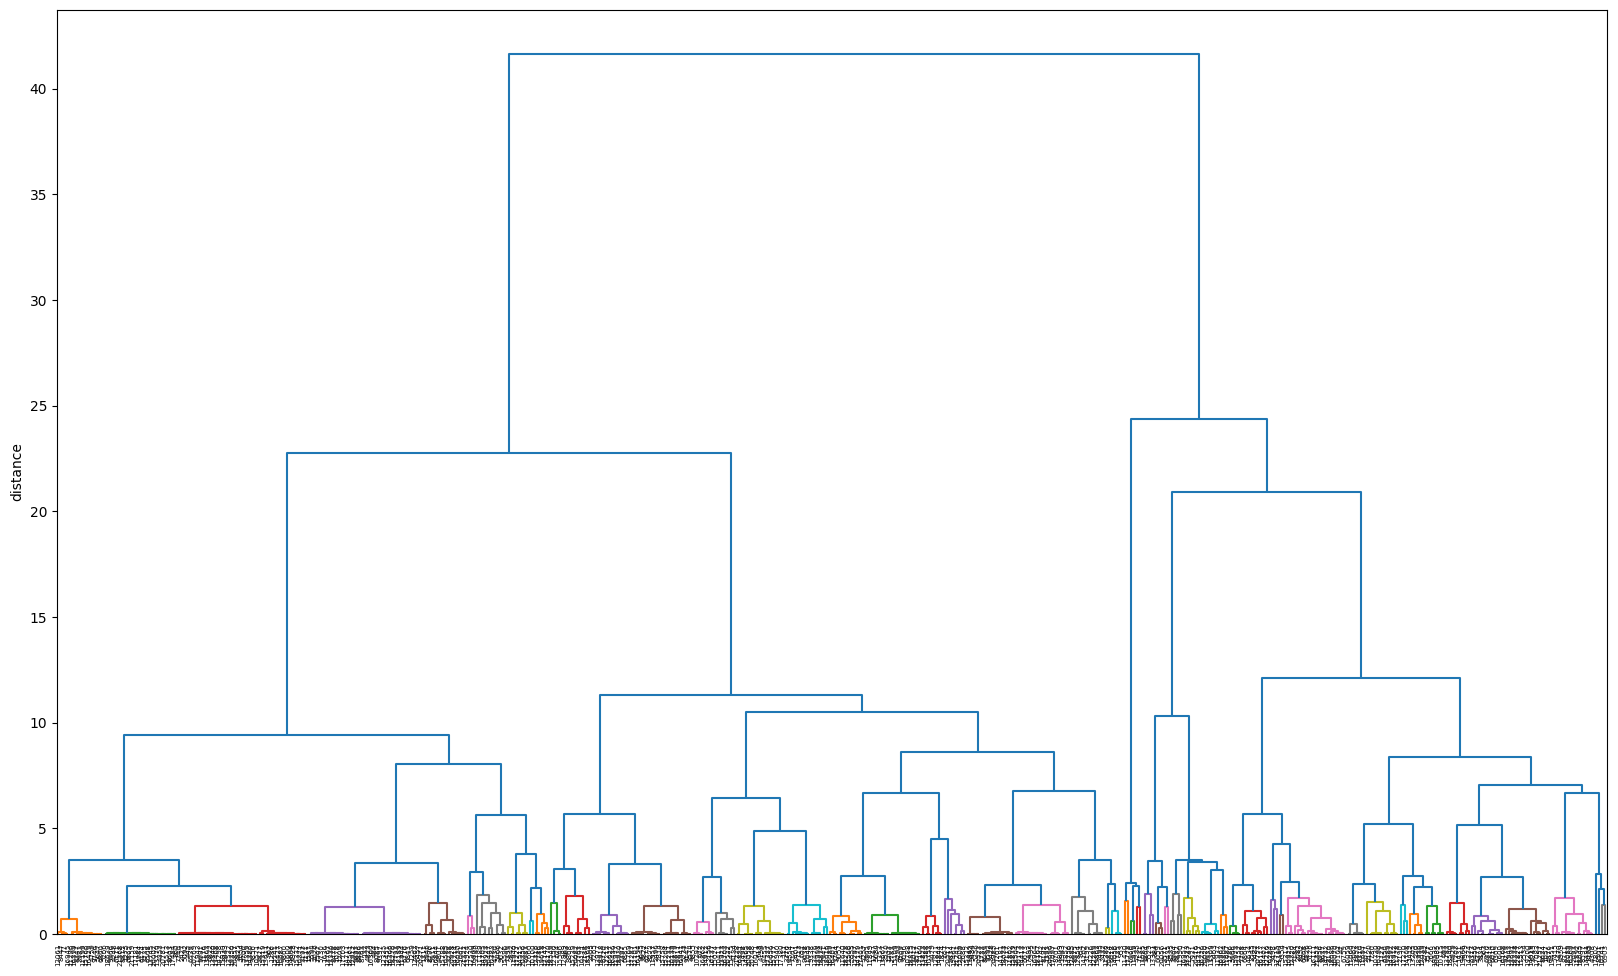

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_sc)

##coordinates of the cluster centers
# kmeans.cluster_centers_
clusters = pd.DataFrame(X_sc, columns=X.columns)
clusters['label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_sc.columns

Index(['ctc', 'years_of_experience', 'classs', 'designation', 'tier', 'label'], dtype='object')

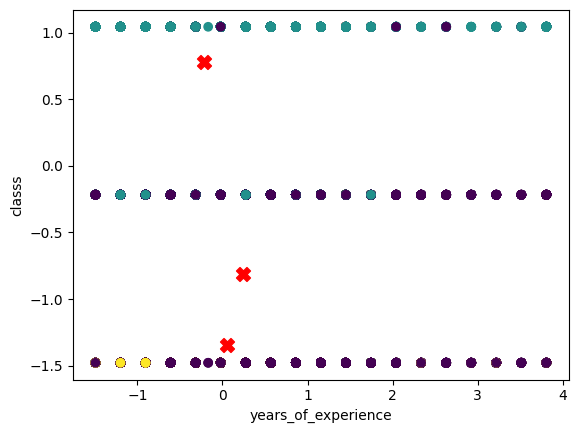

In [ ]:
x_axis = 'years_of_experience'
y_axis = 'classs'

plt.scatter(clusters[x_axis], clusters[y_axis], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel(x_axis)
plt.ylabel(y_axis);

In [ ]:
import plotly.express as px
fig = px.scatter_3d(clusters, x='years_of_experience', y='ctc', z='tier', color='label', width=800, height=800)
fig.show()

In [ ]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience'],
      dtype='object')

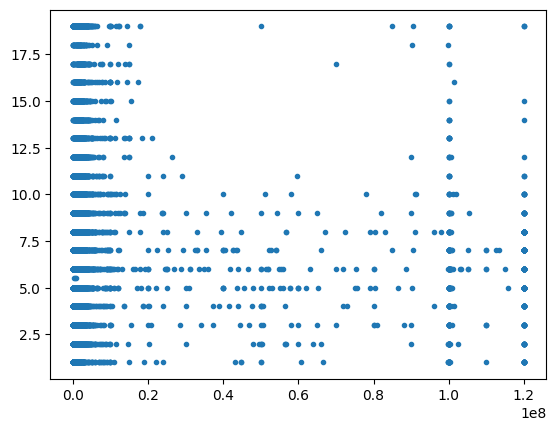

In [ ]:
plt.plot(df['ctc'], df['years_of_experience'], '.')

<Axes: >

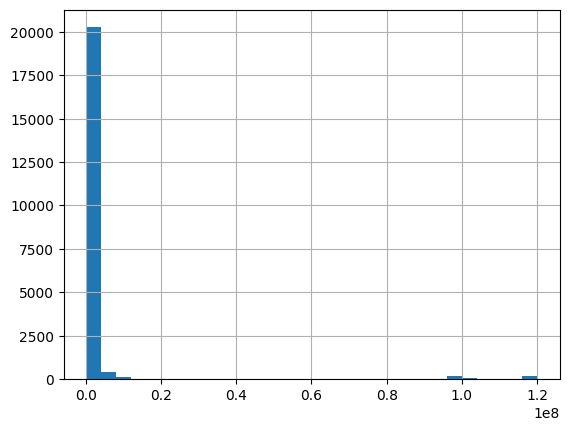

In [ ]:
df['ctc'].hist(bins=30)

In [ ]:
print('Ran')

Ran
